In [3]:
import os
os.chdir('/umbc/xfs1/cybertrn/users/tchapma1/research/synthetic_data/')

# Basic hdf5-png plus rescaling and fft filter

In [7]:
from data_loaders.minimal_load_labeled_data import getData
train, val, test = getData("fft_data_256", "2018") # dataset name, label set

Found 300 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


In [8]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
def showLabeledImage( generator, n=1 ):
    print( generator.class_indices )
    imgs, labels = generator.next()
    n = min(n, len(imgs))
    
    w = min(n, 4)
    h = math.floor( (n+3) / 4 )
    
    plt.figure( figsize=(w*4,h*4))
    for i in range(n):
        plt.subplot( h, w, i+1 )
        plt.imshow(imgs[i]/255)
        plt.xlabel(labels[i])
    plt.show()

{'gw': 0, 'ngw': 1}


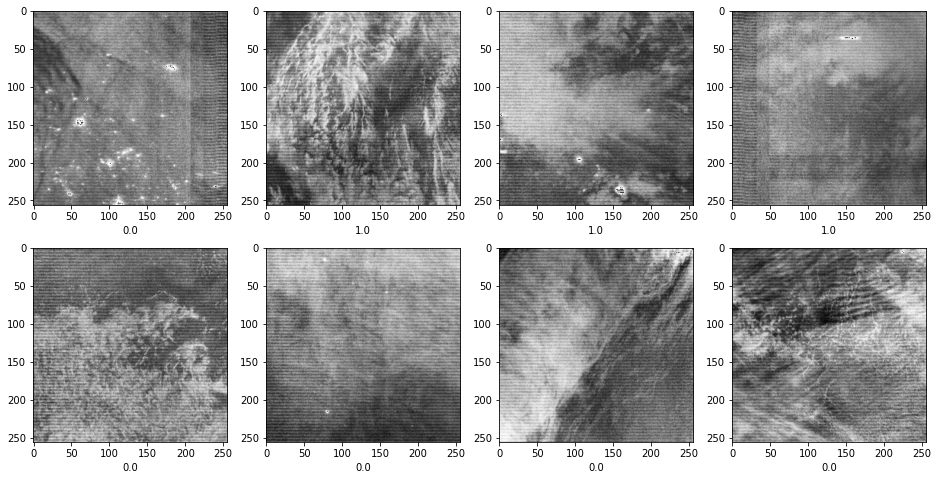

In [9]:
showLabeledImage( train, 8 )

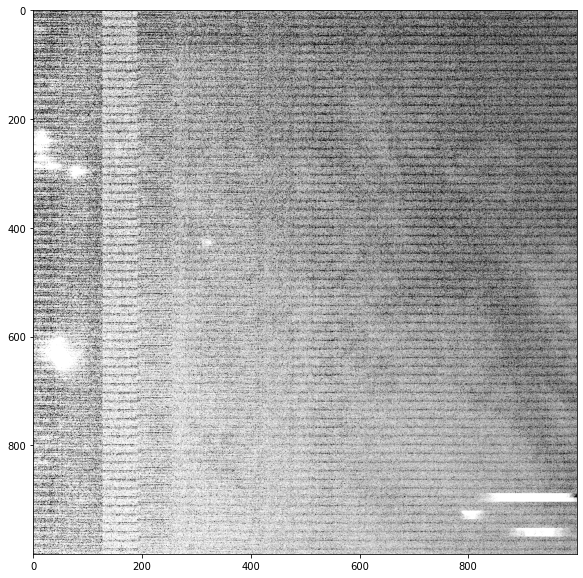

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

def grabImg(path):
    return np.array( Image.open( path ) ).astype(np.float64)#.reshape((dim,dim,-1))

plt.figure( figsize=(10,10) )
plt.imshow( grabImg( "/umbc/xfs1/cybertrn/reu2022/team1/research/2020_data/gw/2020026.2324_01.png" ) / 255 )

## Raw vs. Preprocessed

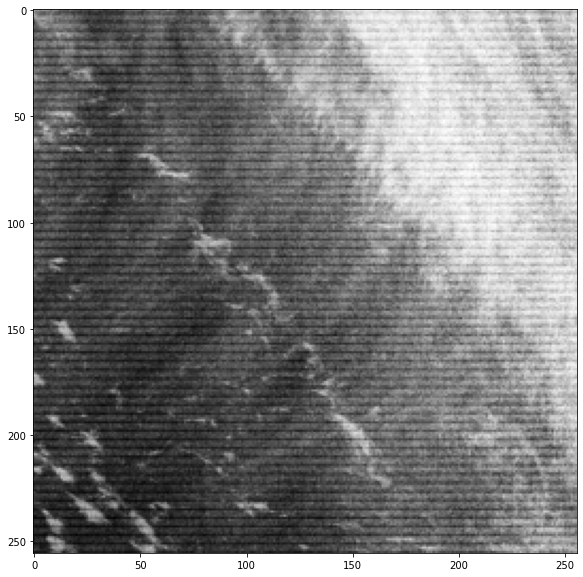

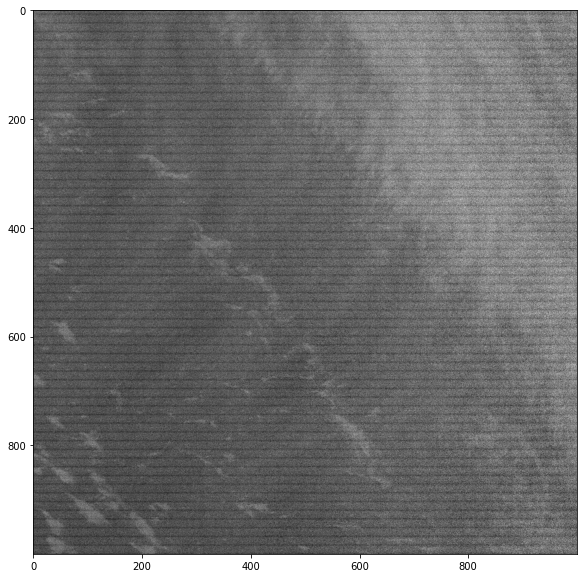

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_loaders.gravity_wave_generation.utils import grabImage
import h5py
import numpy as np

def compare(fn):
    img = grabImage( "/umbc/xfs1/cybertrn/reu2022/team1/datasets/data_256/{}.png".format(fn), 256 )
    hdf = h5py.File("/umbc/xfs1/cybertrn/reu2022/team1/datasets/hdf5/vnb_patch_data_2018/{}.hdf5".format(fn),'r')
    arr = hdf["DNB_observations"][:]

    plt.figure( figsize=(10,10) )
    plt.imshow( img, cmap="gray" )
    plt.show()

    plt.figure( figsize=(10,10) )
    plt.imshow( (arr-np.min(arr)) / (np.max(arr)-np.min(arr)), cmap="gray" )
    plt.show()
compare("2018281.0142_20")


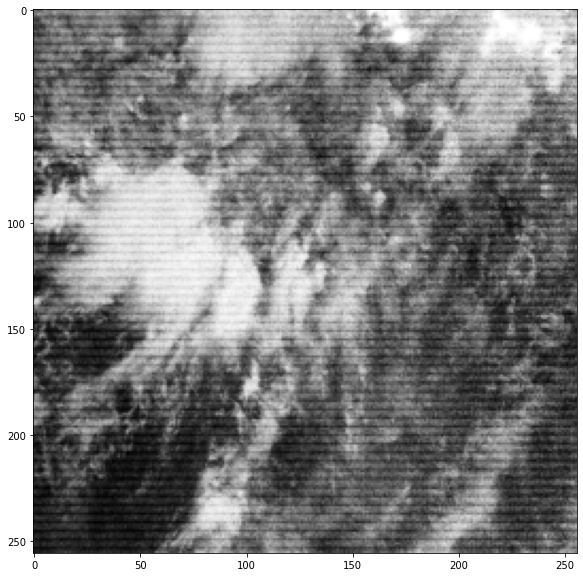

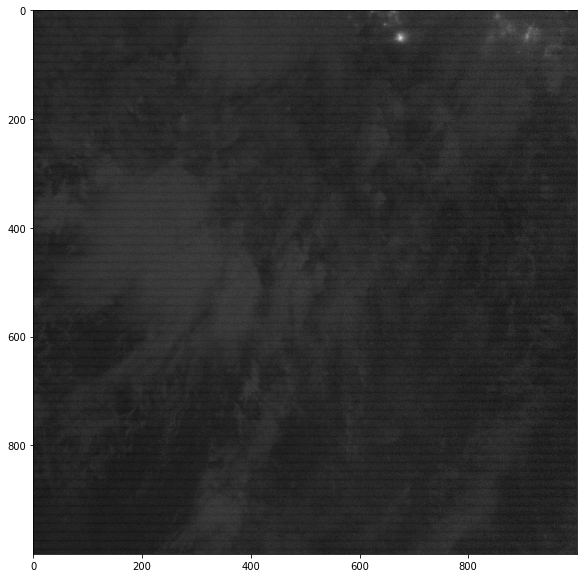

In [13]:
compare("2018282.0754_21")

/umbc/xfs1/cybertrn/reu2022/team1/datasets/data_256/2018131.1012_32.png


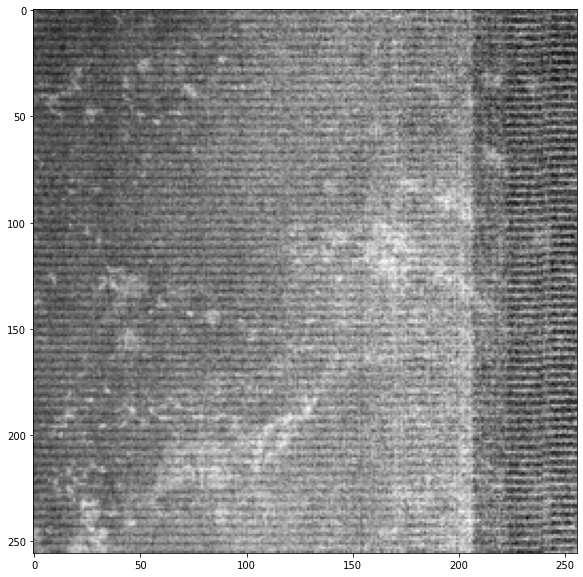

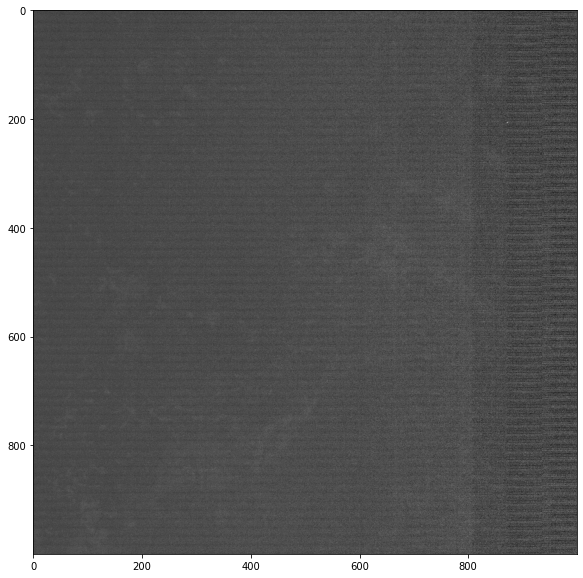

In [16]:
import random
def compareRandomImg():
    root = "/umbc/xfs1/cybertrn/reu2022/team1/datasets/data_256/"
    for path, dirs, files in os.walk(root):
        assert all([f[-3:] == "png" for f in files])
        r = random.randint(0, len(files)-1 )
        print( root+files[r] )
        compare( files[r][:-4] )
compareRandomImg()

# Does image augmentation work?

In [14]:
from data_loaders.gravity_wave_generation.utils import grabImage, augmentImage
from data_loaders.gravity_wave_generation.generate_gravity_wave_simple import generateWavePattern
import random
from PIL import Image

def grabRandomImg():
    root = "/umbc/xfs1/cybertrn/reu2022/team1/datasets/data_256/"
    for path, dirs, files in os.walk(root):
        assert all([f[-3:] == "png" for f in files])
        r = random.randint(0, len(files)-1 )
        print( root+files[r] )
        return grabImage(root+files[r], 256)

/umbc/xfs1/cybertrn/reu2022/team1/datasets/data_256/2018104.1348_31.png
256
Traceback (most recent call last):
  File "/umbc/xfs1/cybertrn/users/tchapma1/research/synthetic_data/data_loaders/gravity_wave_generation/generate_gravity_wave_simple.py", line 11, in generateWavePattern
    raise Exception("yup")
Exception: yup

(256, 256, 1)


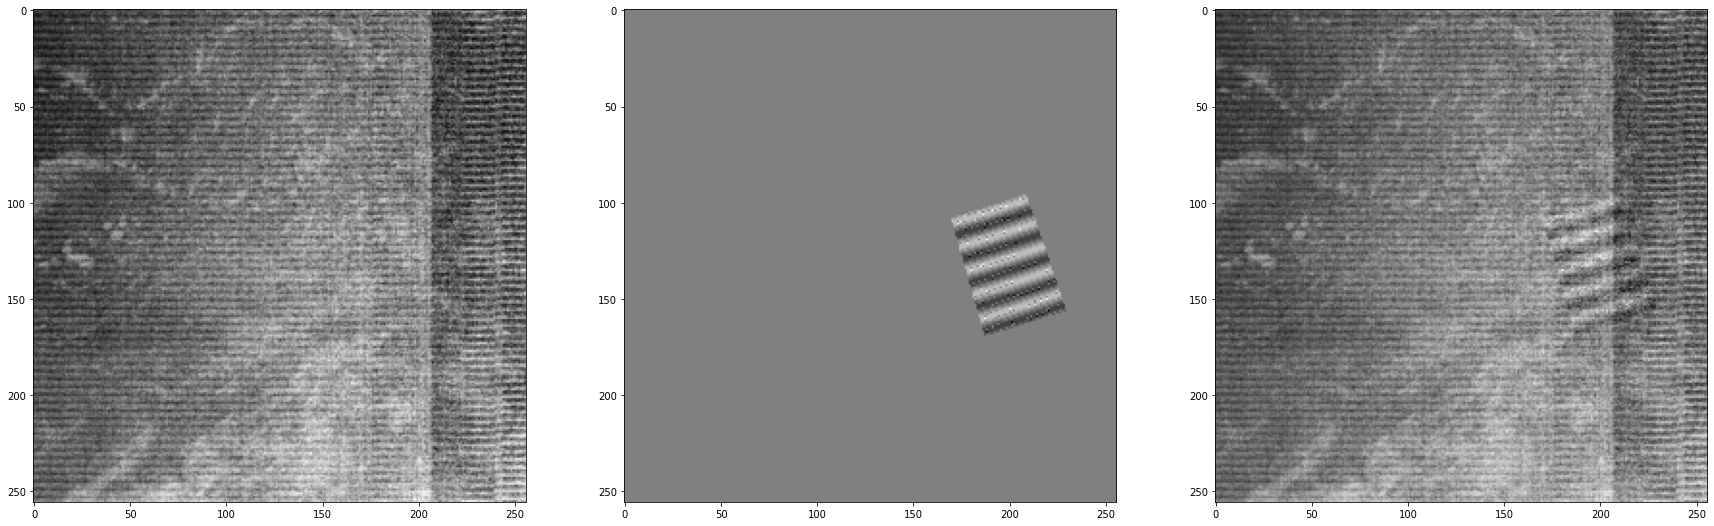

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
img = grabRandomImg()
overlay, aug, coords = augmentImage( img, 256, generateWavePattern )
print( aug.shape )
plt.figure( figsize=(30,10) )
plt.subplot(1,3,1)
plt.imshow( img, cmap="gray" )
plt.subplot(1,3,2)
plt.imshow(overlay, cmap="gray")
plt.subplot(1,3,3)
plt.imshow( aug, cmap="gray" )

# Does the augmented image dataloader work?

In [4]:
from data_loaders.minimal_load_localization_data import getData
from data_loaders.gravity_wave_generation.utils import custom_get_batches
from data_loaders.gravity_wave_generation.generate_gravity_wave_simple import generateWavePattern
train, val, test = getData("fft_data_256", "simple_synthetic_data_256", "simple_synthetic_2018", custom_get_batches( generateWavePattern ))

Found 3012 validated image filenames.
Found 431 validated image filenames.
Found 861 validated image filenames.


In [5]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
def showSyntheticImage( generator, n=1 ):
    imgs, coordss = generator.next()
    n = min(n, len(imgs))
    
    w = min(n, 4)
    h = math.floor( (n+3) / 4 )
    
    plt.figure( figsize=(w*8,h*8))
    for i in range(n):
        plt.subplot( h, w, i+1 )
        
        img = imgs[i]
        coords = [int(len(img)*x) for x in coordss[i]]

        img[coords[0]:coords[2],coords[1]] = 255
        img[coords[0]:coords[2],coords[3]] = 255
        img[coords[0],coords[1]:coords[3]] = 255
        img[coords[2],coords[1]:coords[3]] = 255
        plt.imshow(img/255)
    plt.show()

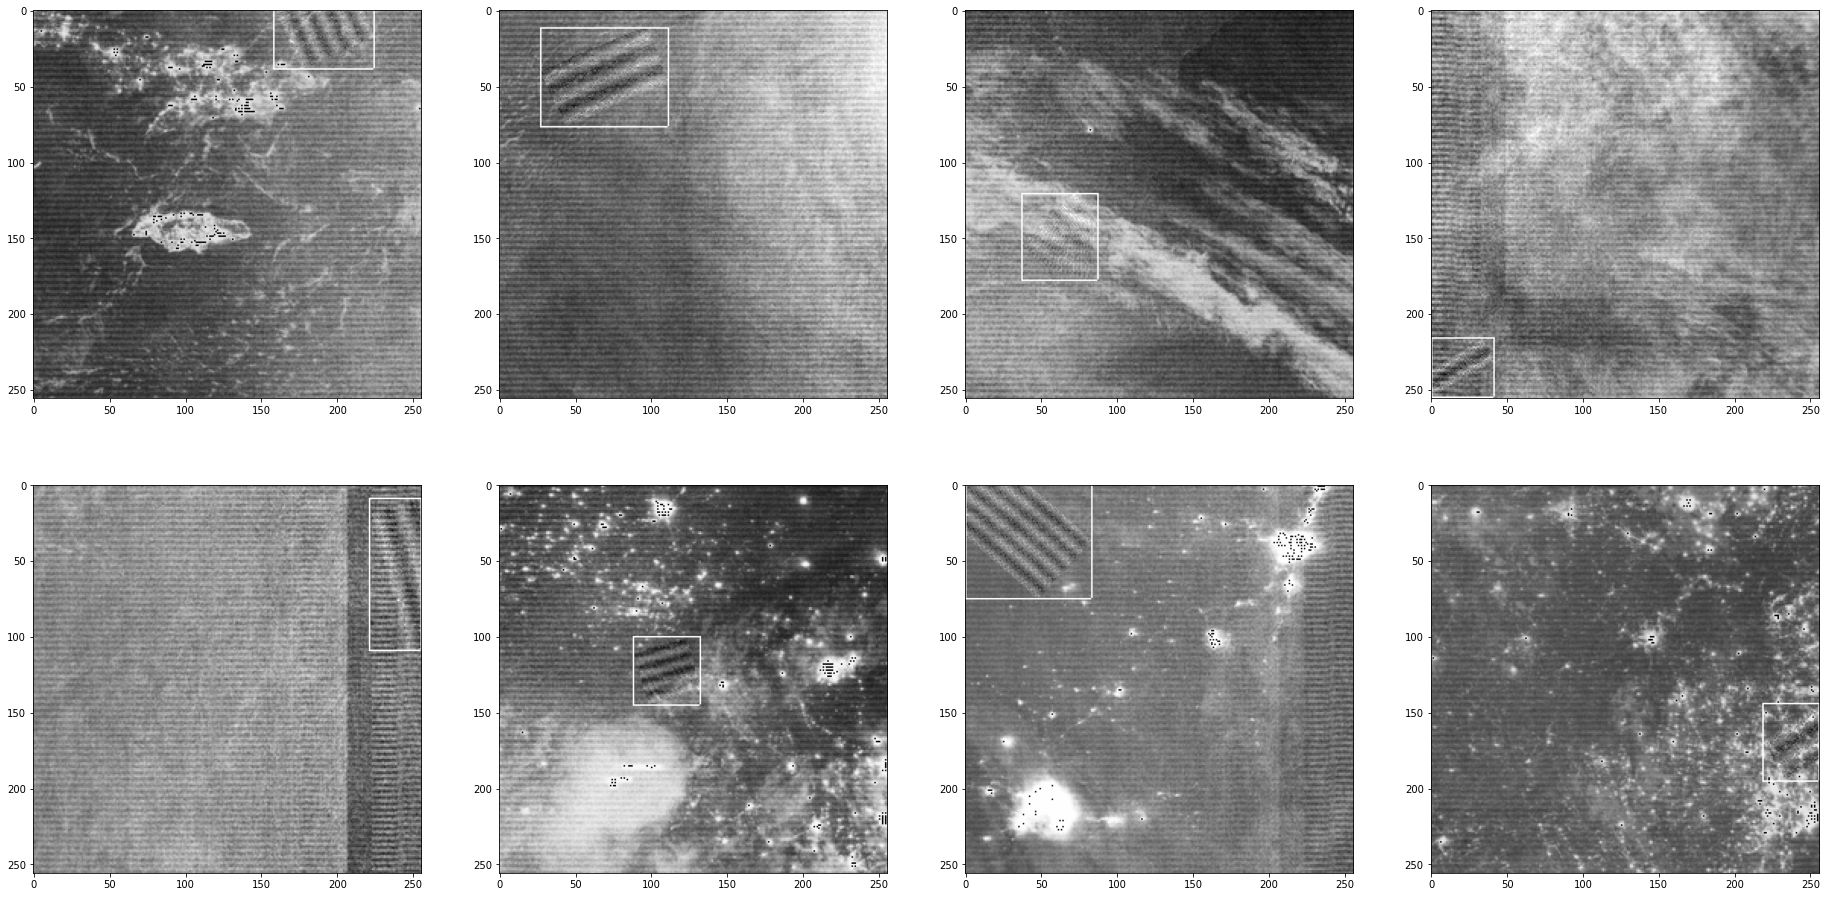

In [6]:
showSyntheticImage( train, 8 )

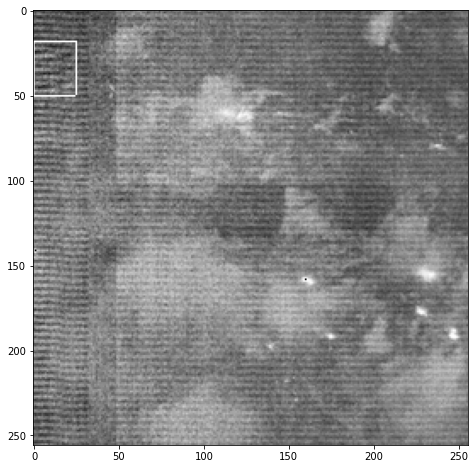

In [6]:
showSyntheticImage( val, 8 )